In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"waitlist_kidney_brazil.csv")


In [3]:
df.head()

,Id,date,age_at_list_registration,age_cat,time_on_Dialysis,race,sex,underline_disease,diabetes,Blood_type,...,Time_death,Transplant,Transplant_Y_N,X36MthsTx,Time_Tx,priorization,removed_list,razon_removed,time,event
0,4,6/29/2017,67,Maior.60,1.0,Branca,M,Outras,1,A,...,13,Não,Não,0,13.07,Não,Não,NaN,392,0
1,5,11/3/2008,58,18.a.60,4.0,Branca,M,Diabetes,0,A,...,69,Óbito Lista,Não,0,68.87,Não,Não,NaN,2066,2
2,6,7/13/2010,51,18.a.60,2.0,Branca,M,HAS,1,O,...,98,Não,Não,0,12.17,Não,Sim,Removido (suspenso > 365 dias),365,3
3,7,10/3/2011,52,18.a.60,17.0,Branca,M,Diabetes,0,O,...,83,Não,Não,0,12.17,Não,Sim,Removido (suspenso > 365 dias),365,3
4,8,7/5/2006,67,Maior.60,68.0,Parda,M,HAS,1,A,...,6,Óbito Lista,Não,0,6.47,Não,Não,NaN,194,2


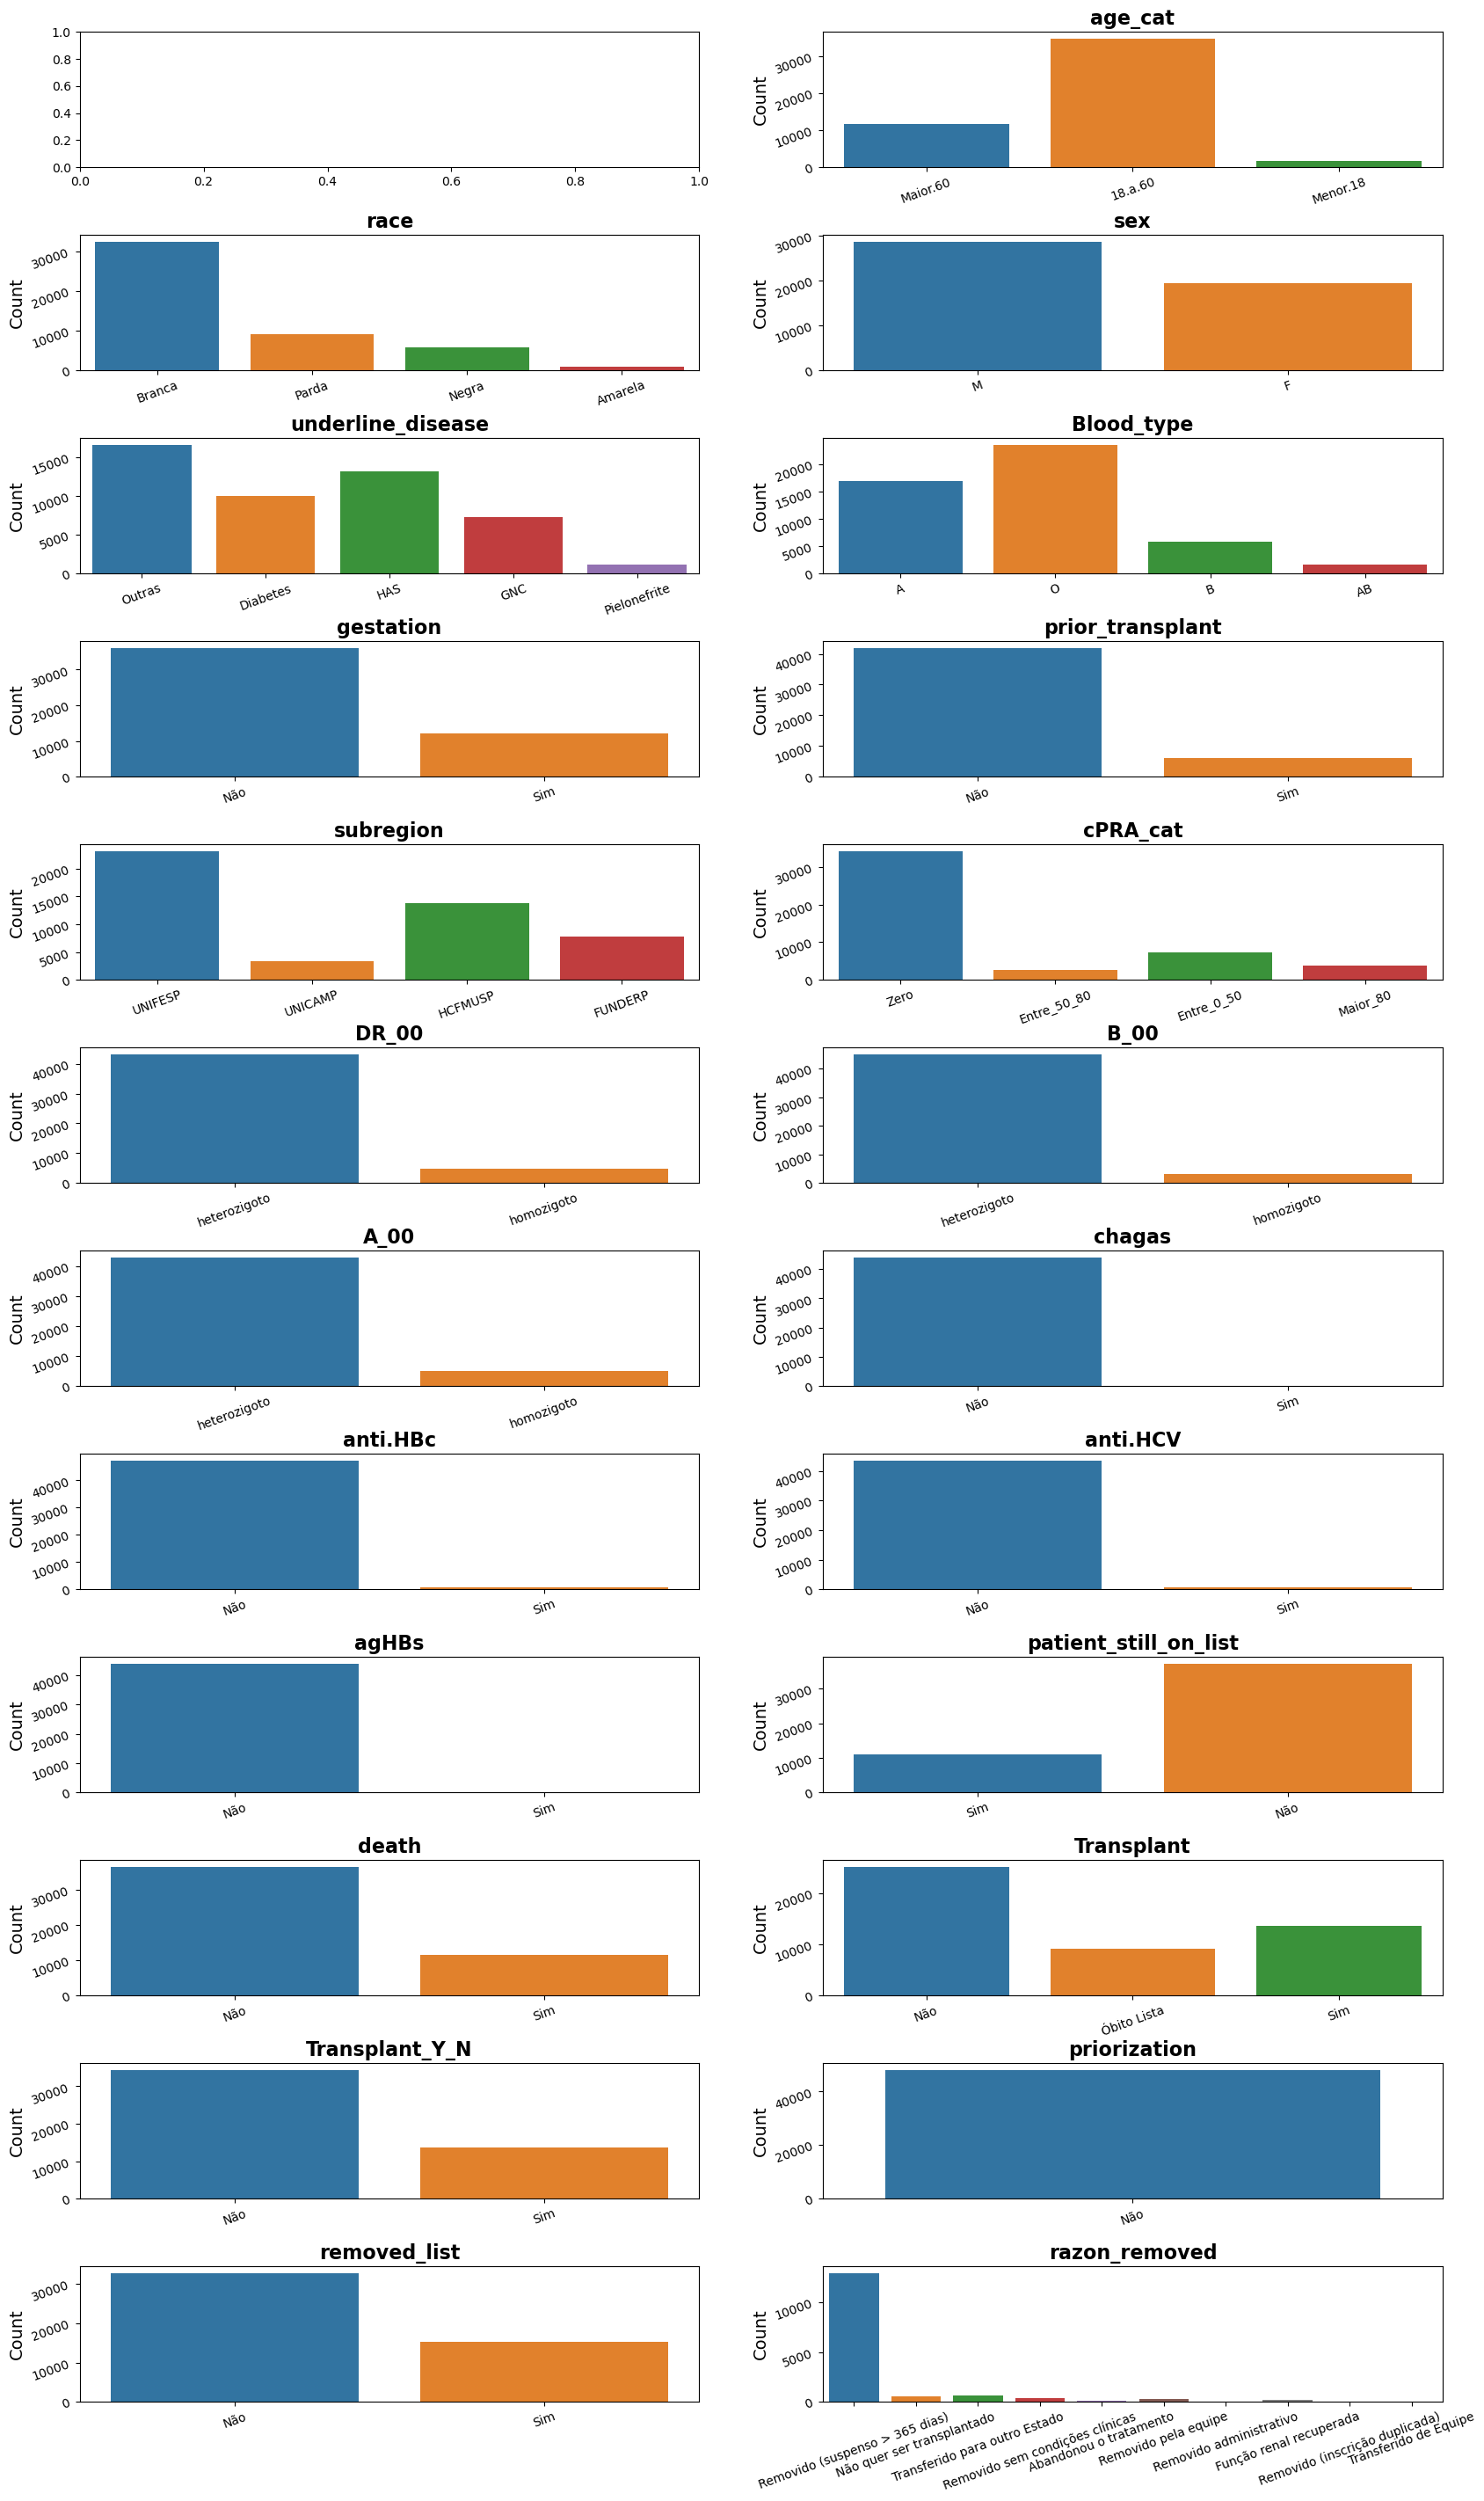

In [4]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of rows and columns for subplots
num_plots = len(categorical_columns)
num_rows = (num_plots // 2) + (num_plots % 2)
num_cols = 2

fig, axes = plt.subplots(num_rows,num_cols, figsize = (20,35))

# Distance between graphs
plt.subplots_adjust(hspace=0.5)

categorical_columns
# Build countplots for each feature
for i, column in enumerate(categorical_columns):
    if column != "date":
        ax = axes[i // 2, i % 2]
        sns.countplot(data=df, x=column, ax=ax)
        
        ax.set_title(column, fontweight = 'bold', fontsize = 16)
        ax.set_xlabel("")
        ax.set_ylabel('Count', fontsize = 14)
        ax.tick_params( rotation=20)

plt.show()


In [25]:
categorical_columns

Index(['date', 'age_cat', 'race', 'sex', 'underline_disease', 'Blood_type',
       'gestation', 'prior_transplant', 'subregion', 'cPRA_cat', 'DR_00',
       'B_00', 'A_00', 'chagas', 'anti.HBc', 'anti.HCV', 'agHBs',
       'patient_still_on_list', 'death', 'Transplant', 'Transplant_Y_N',
       'priorization', 'removed_list', 'razon_removed'],
      dtype='object')

In [ ]:
df["razon_removed"].unique()

# Pre Processing

In [5]:
from cleanProcess.DataCleaning import GetData
pathcsv = "waitlist_kidney_brazil.csv"
Data = GetData(path=pathcsv)

In [2]:
Data.raw_data.head(5)

,Id,date,age_at_list_registration,age_cat,time_on_Dialysis,race,sex,underline_disease,diabetes,Blood_type,...,Time_death,Transplant,Transplant_Y_N,X36MthsTx,Time_Tx,priorization,removed_list,razon_removed,time,event
0,4,6/29/2017,67,Maior.60,1.0,Branca,M,Outras,1,A,...,13,Não,Não,0,13.07,Não,Não,NaN,392,0
1,5,11/3/2008,58,18.a.60,4.0,Branca,M,Diabetes,0,A,...,69,Óbito Lista,Não,0,68.87,Não,Não,NaN,2066,2
2,6,7/13/2010,51,18.a.60,2.0,Branca,M,HAS,1,O,...,98,Não,Não,0,12.17,Não,Sim,Removido (suspenso > 365 dias),365,3
3,7,10/3/2011,52,18.a.60,17.0,Branca,M,Diabetes,0,O,...,83,Não,Não,0,12.17,Não,Sim,Removido (suspenso > 365 dias),365,3
4,8,7/5/2006,67,Maior.60,68.0,Parda,M,HAS,1,A,...,6,Óbito Lista,Não,0,6.47,Não,Não,NaN,194,2


In [3]:
Data.cleaned_data.head(5)

,age_at_list_registration,time_on_Dialysis,race,sex,underline_disease,diabetes,Blood_type,number_transfusion,gestation,number_gestation,...,HLA_DR2,DR_00,B_00,A_00,chagas,anti.HBc,anti.HCV,agHBs,time,event
0,67,1.0,White,M,Others,1,A,0,False,0.0,...,7,heterozygous,heterozygous,heterozygous,False,False,False,False,392,0
6,61,29.0,Black,M,HAS,1,A,1,False,0.0,...,12,heterozygous,heterozygous,heterozygous,False,False,False,False,1114,0
8,55,17.0,White,M,Diabetes,0,B,0,False,0.0,...,12,heterozygous,heterozygous,heterozygous,False,False,False,False,379,0
9,57,10.0,White,M,HAS,1,B,0,False,0.0,...,9,heterozygous,heterozygous,heterozygous,False,False,False,False,1291,0
11,39,12.0,White,M,GNC,1,A,0,False,0.0,...,14,heterozygous,heterozygous,heterozygous,False,False,False,False,4069,0


In [4]:
Xtrain, Ytrain, Xtest, Ytest = Data.get_splitted_scale_encoded_data()

# Exploratory Data Analysis

In [6]:
df_clean = Data.cleaned_data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23156 entries, 0 to 48151
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_at_list_registration  23156 non-null  int64  
 1   time_on_Dialysis          23156 non-null  float64
 2   race                      23156 non-null  object 
 3   sex                       23156 non-null  object 
 4   underline_disease         23156 non-null  object 
 5   diabetes                  23156 non-null  int64  
 6   Blood_type                23156 non-null  object 
 7   number_transfusion        23156 non-null  int64  
 8   gestation                 23156 non-null  bool   
 9   number_gestation          23156 non-null  float64
 10  prior_transplant          23156 non-null  bool   
 11  number_prior_transplant   23156 non-null  int64  
 12  subregion                 23156 non-null  object 
 13  cPRA                      23156 non-null  int64  
 14  HLA_A1

In [32]:
df_clean.describe()

,age_at_list_registration,time_on_Dialysis,diabetes,number_transfusion,number_gestation,number_prior_transplant,cPRA,HLA_A1,HLA_A2,HLA_B1,HLA_B2,HLA_DR1,HLA_DR2,time,event
count,23156.000000,23156.000000,23156.000000,23156.000000,23156.000000,23156.000000,23156.000000,23156.000000,23156.000000,23156.000000,23156.000000,23156.000000,23156.000000,23156.000000,23156.000000
mean,45.958283,21.513172,0.831145,0.460054,0.804154,0.154258,14.649853,10.493868,28.731905,25.740197,41.407367,6.074840,10.444420,1036.772413,0.540897
std,14.721486,29.248332,0.374632,0.653481,1.695280,0.419097,29.298786,13.743924,21.852474,15.548411,16.200171,4.158952,4.671759,978.211291,0.498335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,36.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,11.000000,14.000000,35.000000,3.000000,7.000000,358.000000,0.000000
50%,48.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,29.000000,18.000000,44.000000,4.000000,12.000000,727.000000,1.000000
75%,57.000000,24.000000,1.000000,1.000000,1.000000,0.000000,9.000000,23.000000,33.000000,40.000000,51.000000,9.000000,14.000000,1380.000000,1.000000
max,89.000000,180.000000,1.000000,3.000000,41.000000,5.000000,100.000000,80.000000,80.000000,81.000000,82.000000,16.000000,16.000000,6776.000000,1.000000


### Numeric Variables

In [13]:
# Identify numeric columns
# numeric_columns = df_clean.select_dtypes(include=['int','float']).columns
numeric_columns = ['age_at_list_registration', 
                     'time_on_Dialysis',
                     'number_transfusion',
                     'number_gestation',
                     'number_prior_transplant',
                     'cPRA', 
                     'HLA_A1', 'HLA_A2', 'HLA_B1', 'HLA_B2', 'HLA_DR1', 'HLA_DR2',
                     'time']

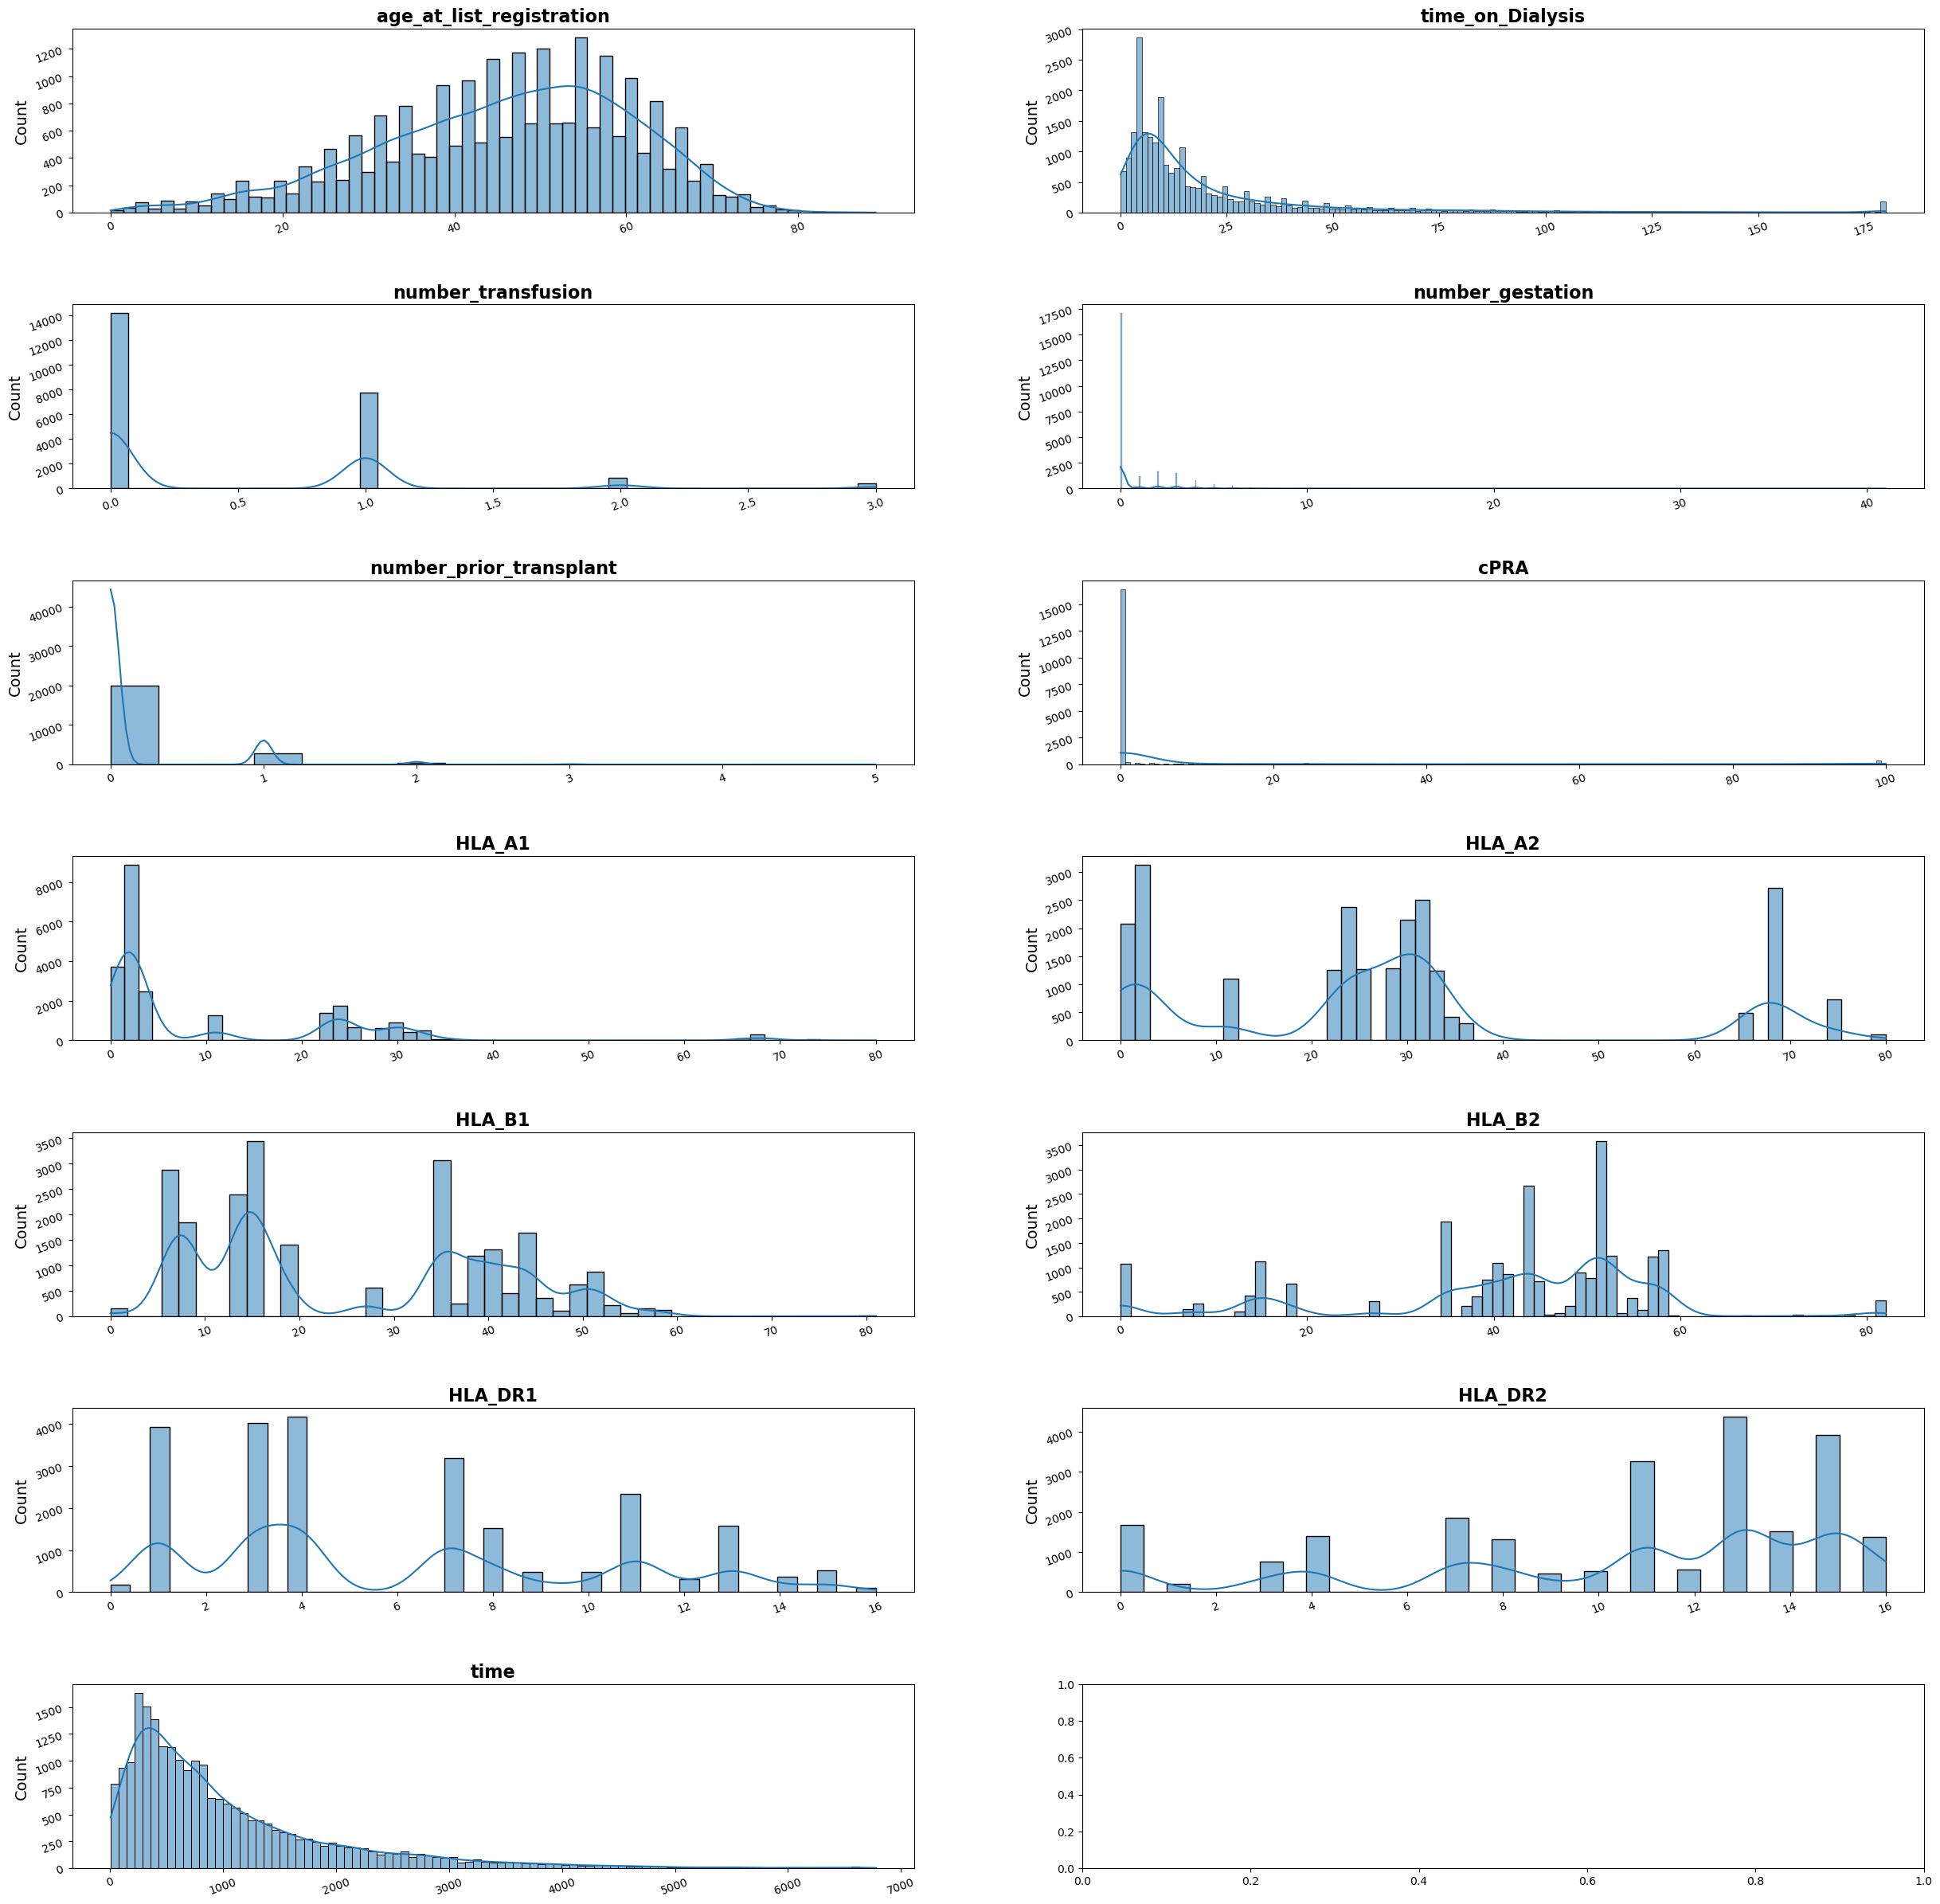

In [31]:
# Calculate the number of rows and columns for subplots
num_plots_n = len(numeric_columns)
num_rows_n = (num_plots_n // 2) + (num_plots_n % 2)
num_cols_n = 2

fig, axes = plt.subplots(num_rows_n, num_cols_n, figsize = (30,30))

# Distance between graphs
plt.subplots_adjust(hspace=0.5)

# Build distributions for each feature
for i, column in enumerate(numeric_columns):
    ax = axes[i // 2, i % 2]
    sns.histplot(df_clean[column], kde=True, ax=ax)
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel("")
    ax.set_ylabel('Count', fontsize = 14)
    ax.tick_params(rotation=20)

plt.show()

From a initial view of the numeric variable distributions, we can see that the following variables have a very long tail, with the majority of patients falling in the lower range.  
*  Time on Dialysis (months)  
*  cPRA  
*  Number of Gestations (i.e., pregnancies)  
*  Time on waitlist (months)  
  

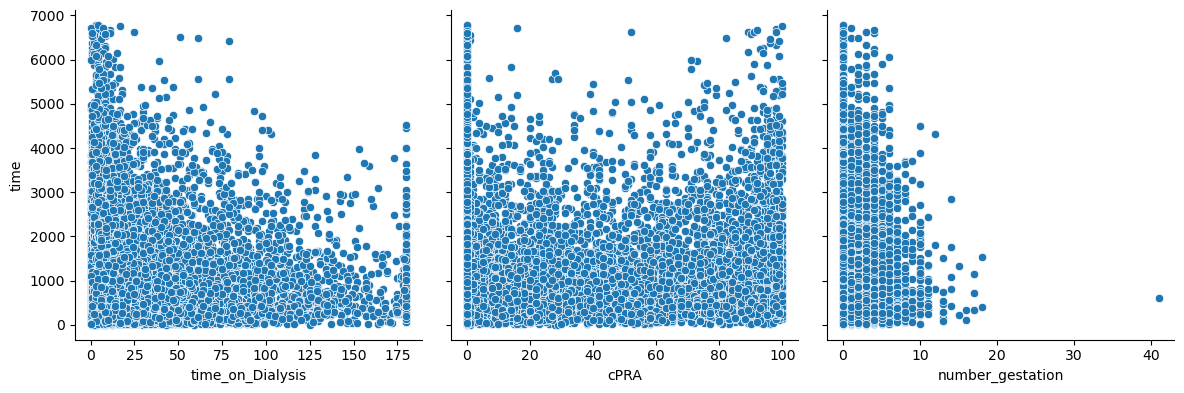

In [44]:
# Create a pairplot to visualize relationships between features
g = sns.PairGrid(df_clean, y_vars=["time"], x_vars=["time_on_Dialysis", "cPRA", "number_gestation"], height=4)
g.map(sns.scatterplot)

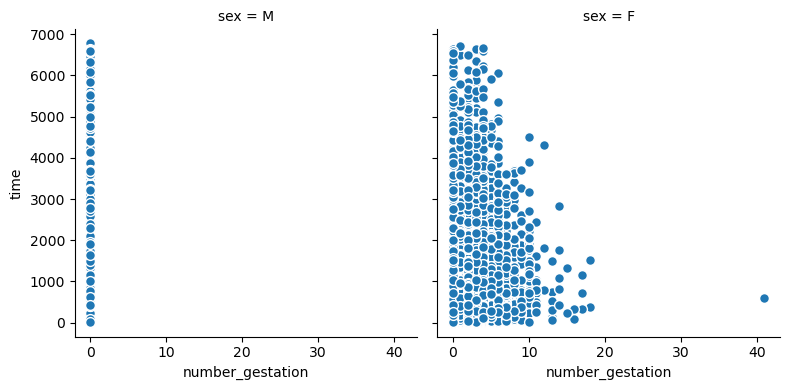

In [46]:
g = sns.FacetGrid(df_clean, col="sex", margin_titles=True, height=4)
g.map(plt.scatter, "number_gestation", "time", edgecolor="white", s=50, lw=1)

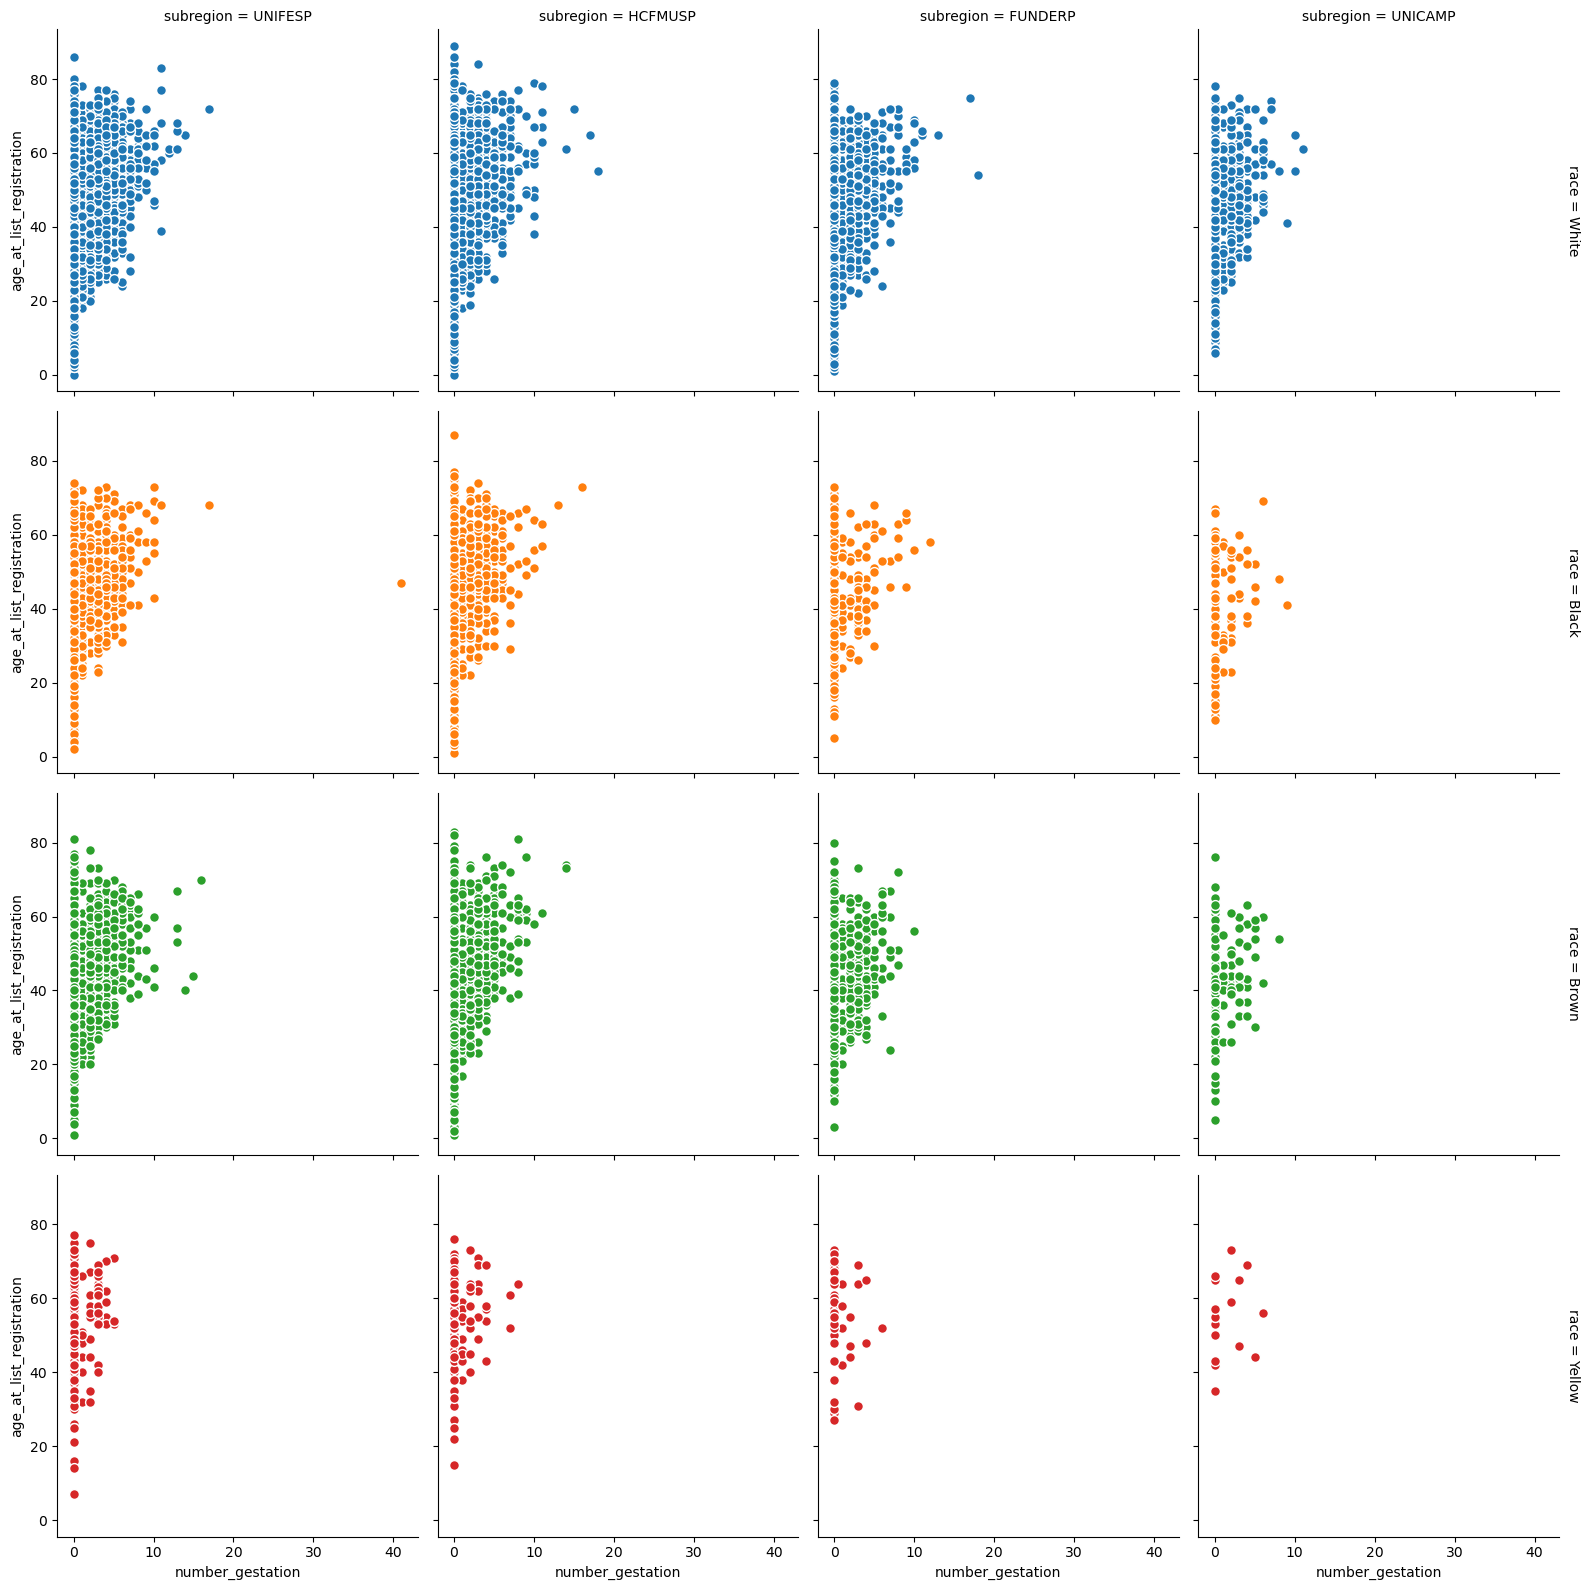

In [62]:
g = sns.FacetGrid(df_clean, col="subregion", row="race", hue="race", margin_titles=True, height=4)
g.map(plt.scatter, "number_gestation", "age_at_list_registration", edgecolor="white", s=50, lw=1)

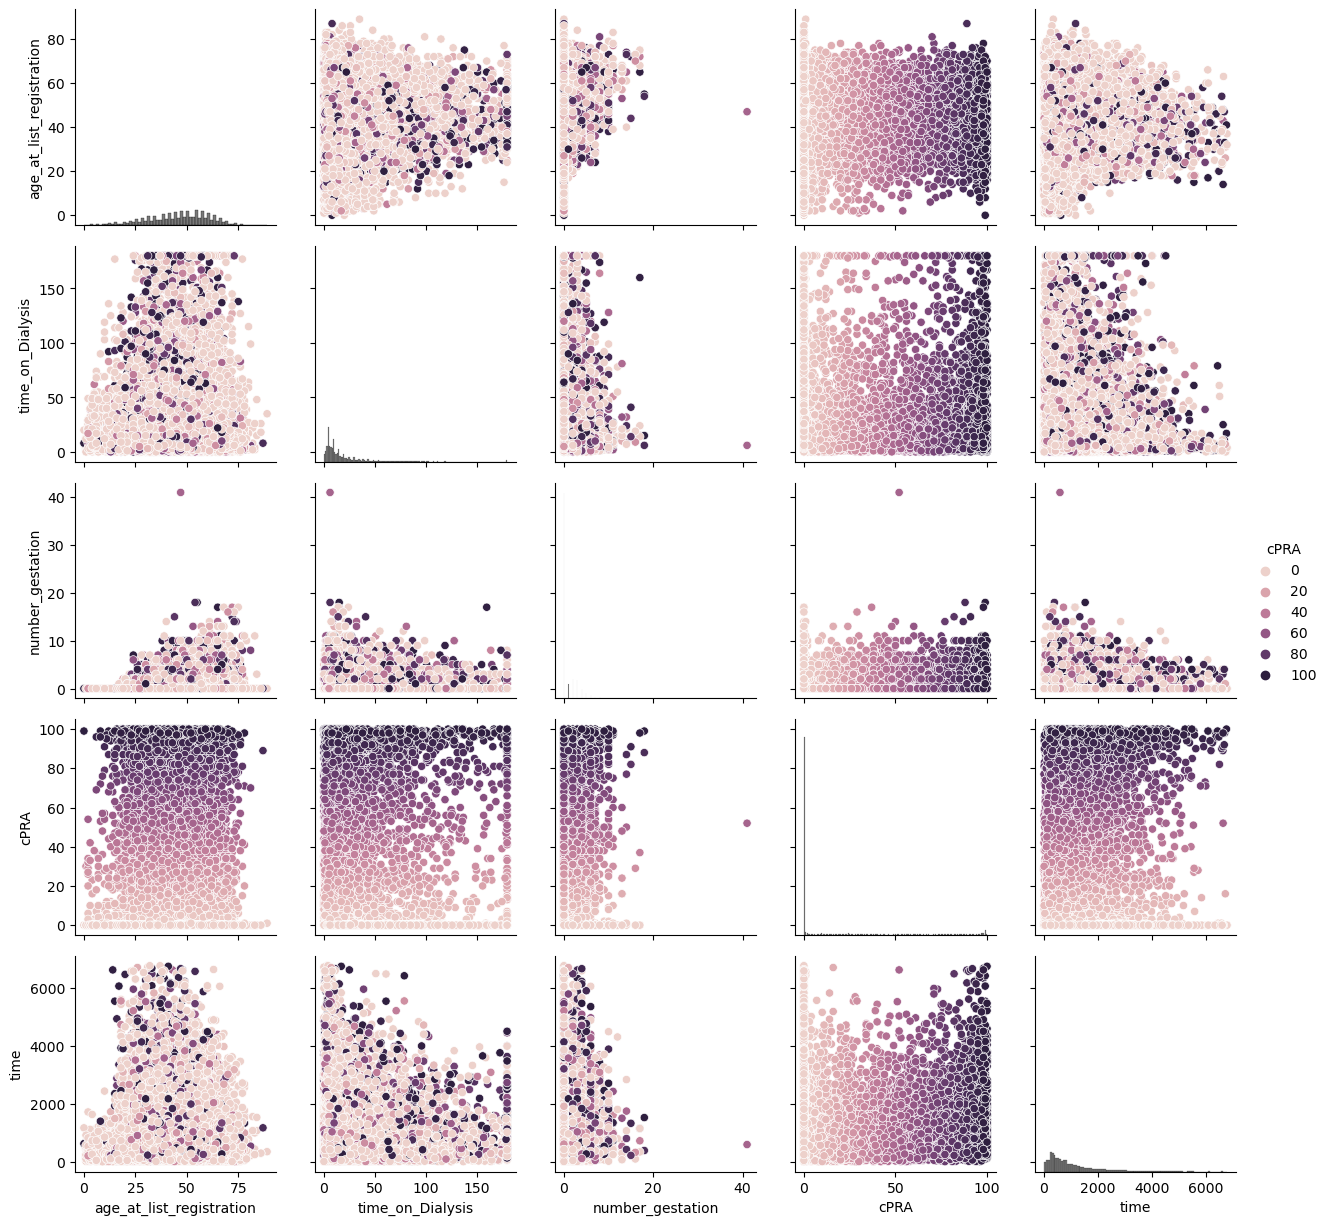

In [45]:
variables = ['age_at_list_registration', 'time_on_Dialysis', 'number_gestation', 'cPRA', 'time']
g = sns.PairGrid(df_clean, hue="cPRA", vars=variables)
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()